In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [44]:
#Imports and setup
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

BASE_PATH = "/content/drive/MyDrive/ArRo/XCOMET_XL_Error_Analysis/Results/"

In [4]:
def load_analysis_results(base_path):
    records = []
    for model in os.listdir(base_path):
        model_path = os.path.join(base_path, model)
        if not os.path.isdir(model_path):
            continue
        for dataset_file in os.listdir(model_path):
            dataset_path = os.path.join(model_path, dataset_file)
            dataset_name = dataset_file.split(model)[0].rstrip("_")
            try:
                with open(dataset_path, 'r', encoding='utf-8') as f:
                    file_data = json.load(f)
                    file_entries = next(iter(file_data.values()), [])
                    for entry in file_entries:
                        src = entry.get("src", "")
                        mt = entry.get("mt", "")
                        ref = entry.get("ref", "")
                        comet = entry.get("COMET", None)
                        for error in entry.get("errors", []):
                            records.append({
                                "model": model,
                                "dataset": dataset_name,
                                "src": src,
                                "mt": mt,
                                "ref": ref,
                                "comet": comet,
                                "error_text": error.get("text", ""),
                                "confidence": error.get("confidence", None),
                                "severity": error.get("severity", "")
                            })
                        if not entry.get("errors"):
                            records.append({
                                "model": model,
                                "dataset": dataset_name,
                                "src": src,
                                "mt": mt,
                                "ref": ref,
                                "comet": comet,
                                "error_text": None,
                                "confidence": None,
                                "severity": None
                            })
            except Exception as e:
                print(f"Error processing {dataset_path}: {e}")
    return pd.DataFrame(records)


In [5]:
#Summarize results
def summarize_results(df):
    summary = df.groupby(['model', 'dataset', 'severity'], dropna=False).agg(
        error_count=('confidence', 'count'),
        avg_confidence=('confidence', 'mean'),
        avg_comet=('comet', 'mean')
    ).reset_index()
    return summary

In [6]:
import os

#Check if BASE_PATH exists
print(os.path.exists(BASE_PATH))

#List model directories
print(os.listdir(BASE_PATH))


True
['opus_subtitles_nllb_error_analysis_output.json', 'LLAMA_TRAINED', 'LLAMA_PRE', 'MISTRAL_PRE', 'MISTRAL_TRAINED', 'GPT4', 'JAIS', 'GEMINI', 'NLLB_TRAINED', 'OPENNMT_BASELINE', 'NLLB', 'OPENNMT_WITHOUT_DIALECTS', 'OPENNMT_LEALLA', 'OPENNMT_GEMINI', 'OPENNMT_WITHOUT_DUPLICATES', 'model_summary.csv', 'representative_errors.csv', 'model_summary_NO_BASELINE.csv', 'representative_errors_NO_BASELINE.csv', 'representative_errors_NO_BASELINE.gsheet']


In [7]:
model_dir = os.path.join(BASE_PATH, "OPENNMT_WITHOUT_DUPLICATES")
print(os.listdir(model_dir))

['arabia_saudita_guvern_OPENNMT_WITHOUT_DUPLICATES_error_analysis_output.json', 'conventia_geneva_OPENNMT_WITHOUT_DUPLICATES_error_analysis_output.json', 'drepturile_copiluluiOPENNMT_WITHOUT_DUPLICATES_error_analysis_output.json', 'drepturile_economice_culturaleOPENNMT_WITHOUT_DUPLICATES_error_analysis_output.json', 'drepturile_omului_OPENNMT_WITHOUT_DUPLICATES_error_analysis_output.json', 'flores+OPENNMT_WITHOUT_DUPLICATES_error_analysis_output.json', 'from_training_dataset_OPENNMT_WITHOUT_DUPLICATES_error_analysis_output.json', 'statutul_refugiatilor_OPENNMT_WITHOUT_DUPLICATES_error_analysis_output.json', 'ksaembassyrouOPENNMT_WITHOUT_DUPLICATES_error_analysis_output.json']


In [8]:
# Load data and generate summary
df = load_analysis_results(BASE_PATH)
summary_df = summarize_results(df)

# Show first few entries
df.head()

,model,dataset,src,mt,ref,comet,error_text,confidence,severity
0,LLAMA_TRAINED,drepturile_omului_llm_trained_error_analysis_o...,المادة 1,ARTICOLUL 1,Articolul 1,0.991473,L,0.405029,minor
1,LLAMA_TRAINED,drepturile_omului_llm_trained_error_analysis_o...,يولد جميع الناس أحراراً ومتساوين في الكرامة وا...,Toţi oamenii se nasc liberi şi egali în demnit...,Toate fiinţele umane se nasc libere şi egale î...,0.967059,tra,0.392578,minor
2,LLAMA_TRAINED,drepturile_omului_llm_trained_error_analysis_o...,المادة 2,"Art. 2 În sensul prezentului regulament, următ...",Articolul 2,0.924590,None,NaN,None
3,LLAMA_TRAINED,drepturile_omului_llm_trained_error_analysis_o...,لكلِّ إنسان حقُّ التمتُّع بجميع الحقوق والحرِّ...,Fiecare persoană are dreptul de a se bucura de...,Fiecare om se poate prevala de toate drepturil...,0.785408,alte opiniile,0.377441,minor
4,LLAMA_TRAINED,drepturile_omului_llm_trained_error_analysis_o...,لكلِّ إنسان حقُّ التمتُّع بجميع الحقوق والحرِّ...,Fiecare persoană are dreptul de a se bucura de...,Fiecare om se poate prevala de toate drepturil...,0.785408,stare,0.373535,minor


In [9]:
summary_df.head()

,model,dataset,severity,error_count,avg_confidence,avg_comet
0,GEMINI,arabia_saudita_guvern_gemini_error_analysis_ou...,critical,44,0.478410,0.318669
1,GEMINI,arabia_saudita_guvern_gemini_error_analysis_ou...,major,123,0.381123,0.640151
2,GEMINI,arabia_saudita_guvern_gemini_error_analysis_ou...,minor,140,0.387474,0.886886
3,GEMINI,arabia_saudita_guvern_gemini_error_analysis_ou...,NaN,0,NaN,0.896028
4,GEMINI,conventia_geneva_gemini_error_analysis_output....,critical,74,0.440255,0.273011


In [10]:
summary_df = summary_df[summary_df['model'] != 'OPENNMT_BASELINE']

In [11]:
df = df[df['model'] != 'OPENNMT_BASELINE']

In [50]:
df['model'].unique()

array(['LLAMA_TRAINED', 'LLAMA_PRE', 'MISTRAL_PRE', 'MISTRAL_TRAINED',
       'GPT4', 'JAIS', 'GEMINI', 'NLLB_TRAINED', 'NLLB',
       'OPENNMT_WITHOUT_DIALECTS', 'OPENNMT_LEALLA', 'OPENNMT_GEMINI',
       'OPENNMT_WITHOUT_DUPLICATES'], dtype=object)

In [51]:
model_labels = [ 'llama_trained',
 'llama_pre', 'mistral_pre', 'mistral_trained', 'gpt4',
 'jais', 'gemini', 'nllb_trained',  'nllb',
 'transf_no_dialects', 'transf_lealla',  'transf_gemini',
 'transf_no_duplicates'
]

/tmp/ipython-input-4104439829.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(model_labels, rotation=-25, ha='center', fontsize=12)


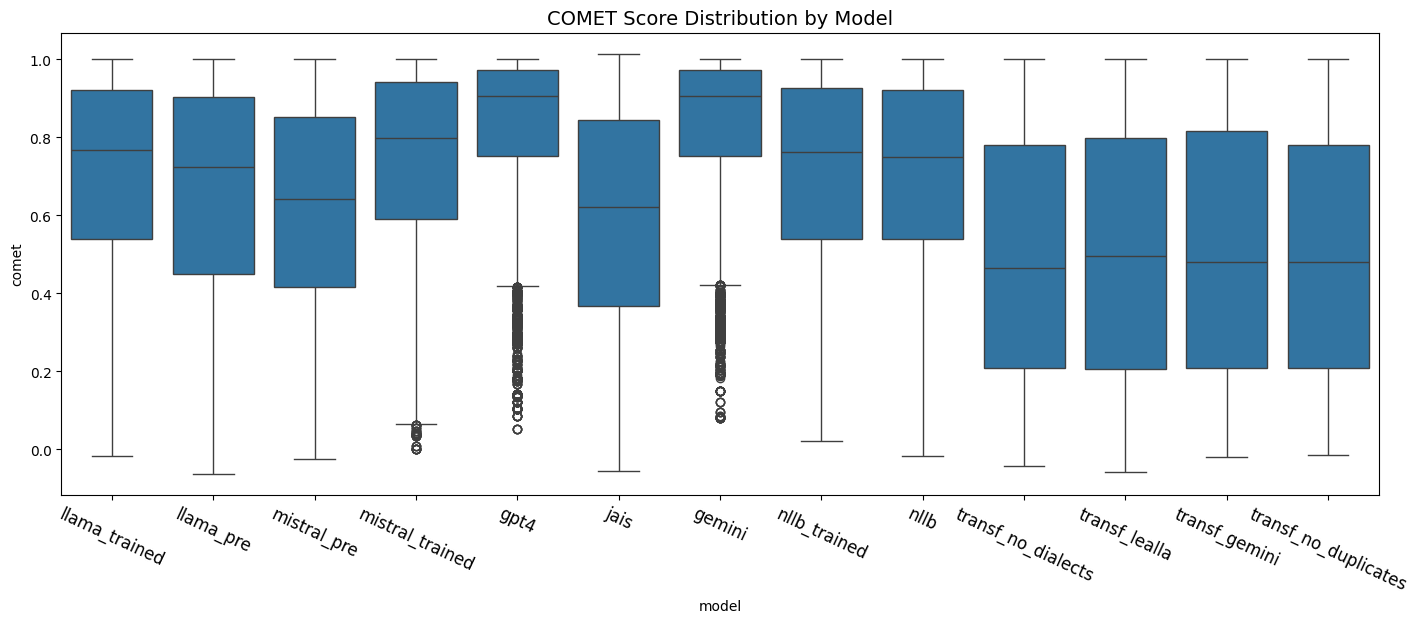

In [86]:
#COMET Score distribution by model
plt.figure(figsize=(17, 6))
ax = sns.boxplot(data=df[df["comet"].notna()], x="model", y="comet")
ax.set_xticklabels(model_labels, rotation=-25, ha='center', fontsize=12)
plt.title("COMET Score Distribution by Model", fontsize=14)
plt.show()


/tmp/ipython-input-1980001835.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(model_labels, rotation=-25, ha='center', fontsize=12)


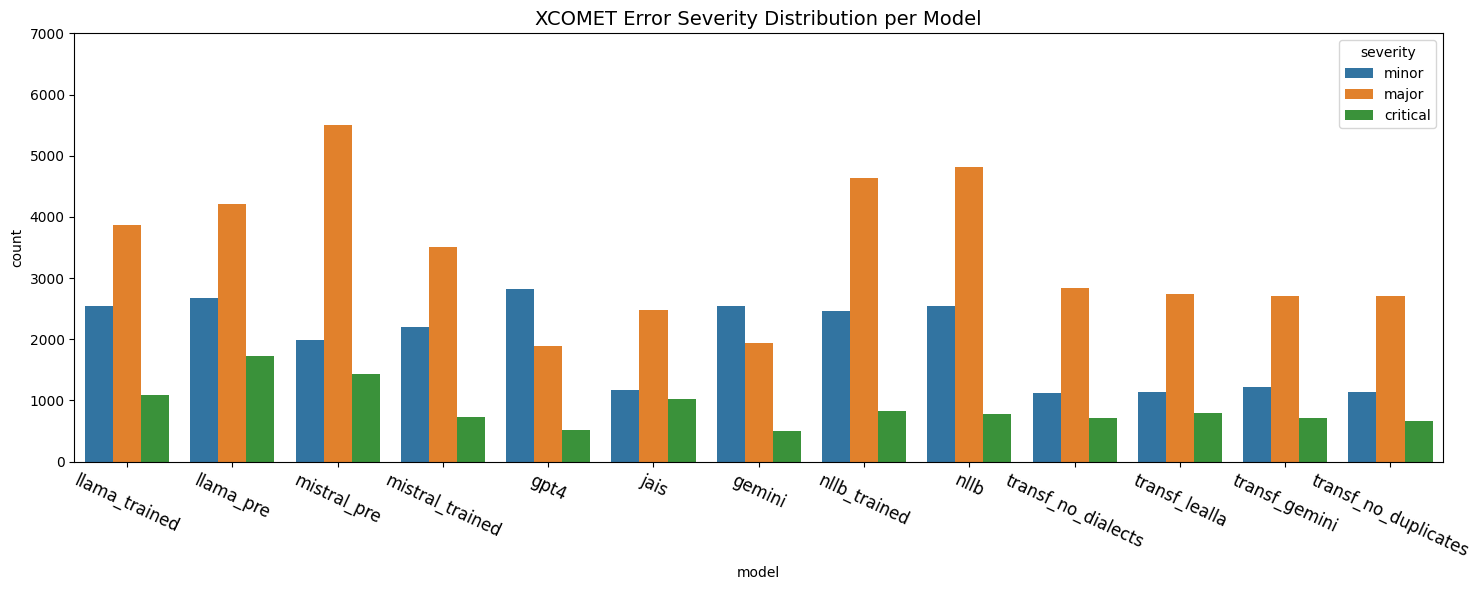

In [85]:
#Error count by severity per model
plt.figure(figsize=(15, 6))
ax = sns.countplot(data=df[df["severity"].notna()], x="model", hue="severity")
plt.title("XCOMET Error Severity Distribution per Model", fontsize=14)
ax.set_xticklabels(model_labels, rotation=-25, ha='center', fontsize=12)
plt.ylim(0, 7000)
plt.tight_layout()
plt.show()

In [14]:
def get_representative_examples(df, n=3):
    examples = (
        df[df["severity"].notna()]
        .sort_values(["severity", "confidence"], ascending=[True, True])
        .groupby("severity")
        .head(n)
        .reset_index(drop=True)
    )
    return examples[["model", "dataset", "severity", "confidence", "src", "mt", "ref", "error_text"]]

In [15]:
examples_df = get_representative_examples(df, n=4)
examples_df#.head(10)

,model,dataset,severity,confidence,src,mt,ref,error_text
0,GEMINI,ksaembassyrougemini_error_analysis_output.json,critical,0.263672,صاحب السمو الملكي الأمير محمد بن سلمان بن عبدا...,Alteța Sa Regală Prințul Mohammed bin Salman b...,Alteța Sa Regală Prințul Mohammed bin Salman b...,fu
1,LLAMA_PRE,from_training_dataset_llm_error_analysis_outpu...,critical,0.265381,عزيزي ، هو يستطيع أن يتذوق الفرق بينهم ، لقد ح...,"Dragă, el poate gusta diferența dintre ei, am ...","Dragă, îşi dă seama de diferenţă.",am
2,OPENNMT_LEALLA,conventia_geneva,critical,0.268555,يكون لممثلي الدولة الحامية حق حضور جلسات أي مح...,Reprezentanții statului protector au dreptul d...,Reprezentanții Puterii protectoare vor avea dr...,mod
3,GEMINI,ksaembassyrougemini_error_analysis_output.json,critical,0.270020,استقبل نائب رئيس البرلمان ورئيس حزب العمل والت...,Vicepreședintele Parlamentului și președintele...,Vicepreședintele Parlamentului și Președintele...,yat
4,LLAMA_PRE,from_training_dataset_llm_error_analysis_outpu...,major,0.256592,يشار إلى أن قضاء القائم الذي يقع في أقصى غرب م...,"Se pare că districtul Al-Qaim, situat în parte...","Al-Qaim, situat în vestul extrem al provinciei...",guvern
5,GPT4,ksaembassyrougpt4_error_analysis_output.json,major,0.264893,استقبل نائب رئيس الوزراء وزير خارجية جمهورية #...,Viceprim-ministrul și ministrul afacerilor ext...,Viceprim-ministrul și ministrul Afacerilor Ext...,Sf
6,GPT4,ksaembassyrougpt4_error_analysis_output.json,major,0.271973,حضر سفير خادم الحرمين الشريفين لدى رومانيا د. ...,Ambasadorul Serviciului celor două Moschei Sfi...,Ambasadorul Custodelui celor Două Sfinte Mosch...,Aga
7,GPT4,ksaembassyrougpt4_error_analysis_output.json,major,0.272461,استقبل نائب رئيس الوزراء وزير خارجية جمهورية #...,Viceprim-ministrul și ministrul afacerilor ext...,Viceprim-ministrul și ministrul Afacerilor Ext...,ghani
8,LLAMA_TRAINED,drepturile_economice_culturalellm_trained_erro...,minor,0.257080,الجزء الخامس,Capitolul 5: Cum să vă găsiți fericirea,Partea A CINCEA,Capitol
9,OPENNMT_LEALLA,arabia_saudita_guvern,minor,0.263672,2 ضريبة الدخل بما فيها ضريبة استثمار الغاز الط...,"2 Impozit pe venit, inclusiv impozitul pe inve...",(ii) impozitul pe profit;,venit


In [16]:
summary_df.to_csv(BASE_PATH + "model_summary_final.csv", index=False)
examples_df.to_csv(BASE_PATH + "representative_errors_final.csv", index=False)